## Enmarcar el problema

Los insectos nocturnos representan uno de los grupos más diversos de organismos, por lo que es de suma importancia estudiarlos.


Es por ello que un grupo de prestigiosos entomólogos han construido un ecosistema aislado con múltiples especies para poder estudiarlos en mayor detalle. Para este estudio están diseñando un sistema de sensores para poder trackear de forma automática las dinámicas y hábitos de estos insectos.

## Librerias

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [130]:
from imblearn.over_sampling import KMeansSMOTE
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, classification_report

In [131]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

In [132]:
from imblearn.datasets import fetch_datasets
from kmeans_smote import KMeansSMOTE
from sklearn.metrics import f1_score

In [133]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree


## Obtener la dataframe

In [4]:
data= pd.read_csv('https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/jobarcelona22/train.csv')

In [5]:
data

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2
...,...,...,...,...,...,...,...,...,...,...
6996,6996,21,0,6.576106,301.050638,146.682819,-209.480741,-129.776336,-51.226256,1
6997,6997,18,57,-6.169382,-317.652257,-161.644320,248.055724,-112.626344,99.463913,0
6998,6998,22,47,-7.289684,-406.732525,-212.097250,248.745127,116.893077,32.806150,0
6999,6999,18,14,-92.317105,-191.555040,88.371271,38.728565,-39.050466,20.356711,0


## Procesar el dataframe

In [66]:
## Comprobación de valores de la columna Unnamed, para determinar si tiene valor. O es el indice de nuestra tabla
data['Unnamed: 0'].value_counts().sum()

7001

In [3]:
## Eliminacion de la columna Unnamed: 0
data = data.drop(['Unnamed: 0'], axis=1)

In [68]:
## Comprobación de valores duplicados 
sum(data.duplicated())

0

In [69]:
## Comprobación de valores nulos
print(data.isnull().sum())

Hour                 0
Minutes              0
Sensor_alpha         0
Sensor_beta          0
Sensor_gamma         0
Sensor_alpha_plus    0
Sensor_beta_plus     0
Sensor_gamma_plus    0
Insect               0
dtype: int64


In [71]:
data.dtypes

Hour                   int64
Minutes                int64
Sensor_alpha         float64
Sensor_beta          float64
Sensor_gamma         float64
Sensor_alpha_plus    float64
Sensor_beta_plus     float64
Sensor_gamma_plus    float64
Insect                 int64
dtype: object

## EDA

### Correlación entre variables

<ipython-input-79-ef5849c17c65>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


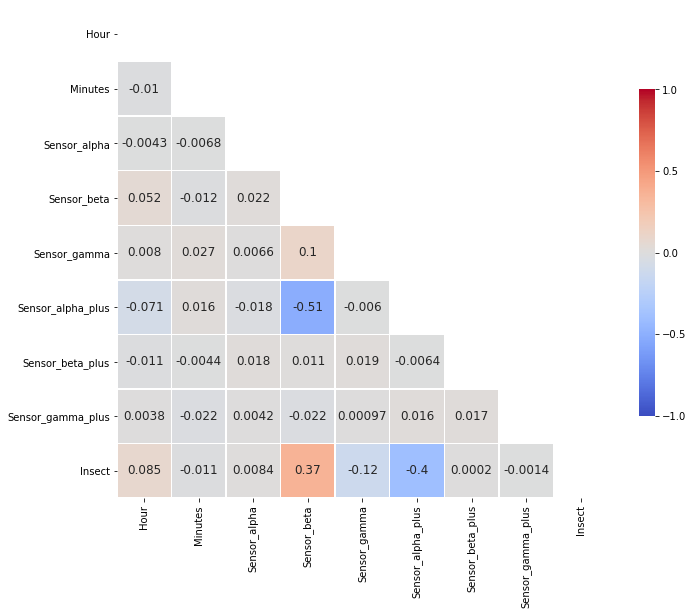

In [79]:
## Comprobación de la correlación entre las diferentes variables
corr = data.corr()
## Crear una máscara para ocultar el triángulo superior de la matriz para no tenerlo duplicado
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(11, 15))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
## agregacion de los nombres de las columnas como etiquetas
ax.set_yticklbels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Insect-Hour

In [72]:
data

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2
...,...,...,...,...,...,...,...,...,...
6996,21,0,6.576106,301.050638,146.682819,-209.480741,-129.776336,-51.226256,1
6997,18,57,-6.169382,-317.652257,-161.644320,248.055724,-112.626344,99.463913,0
6998,22,47,-7.289684,-406.732525,-212.097250,248.745127,116.893077,32.806150,0
6999,18,14,-92.317105,-191.555040,88.371271,38.728565,-39.050466,20.356711,0


In [73]:
## Comprobación de la distribución de ejemplos por cada familia de insectos
data['Insect'].value_counts()

0    3519
1    2793
2     689
Name: Insect, dtype: int64

In [ ]:
## Comprobación de la distribución de clases de insectos segun la hora y los minutos 

In [81]:
grouped_insect = data.groupby('Insect')
grouped_insect.Hour.describe()

,count,mean,std,min,25%,50%,75%,max
Insect,,,,,,,,
0,3519.0,19.224211,3.528657,1.0,18.0,20.0,21.0,23.0
1,2793.0,20.047619,3.377548,1.0,21.0,21.0,21.0,23.0
2,689.0,19.693759,3.691675,1.0,19.0,20.0,22.0,23.0


In [82]:
grouped_Hour = data.groupby('Hour')
grouped_Hour.Insect.describe()

,count,mean,std,min,25%,50%,75%,max
Hour,,,,,,,,
1,31.0,0.419355,0.620440,0.0,0.0,0.0,1.0,2.0
2,24.0,0.541667,0.721060,0.0,0.0,0.0,1.0,2.0
3,27.0,0.481481,0.700020,0.0,0.0,0.0,1.0,2.0
4,32.0,0.625000,0.659912,0.0,0.0,1.0,1.0,2.0
5,45.0,0.622222,0.613814,0.0,0.0,1.0,1.0,2.0
6,16.0,0.562500,0.727438,0.0,0.0,0.0,1.0,2.0
7,40.0,0.600000,0.744208,0.0,0.0,0.0,1.0,2.0
8,30.0,0.600000,0.723974,0.0,0.0,0.0,1.0,2.0
9,32.0,0.750000,0.567962,0.0,0.0,1.0,1.0,2.0


In [ ]:
## Comprobación de la distribución de clases de insectos segun la hora y los minutos en forma de boxplot

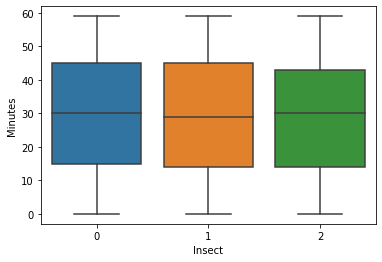

In [76]:
ax = sns.boxplot(x="Insect", y="Minutes", data=data)

Se puede ver como se produce una distribucion equitativa a lo largo de los minutos, por lo que no influye por la tipo de insecto

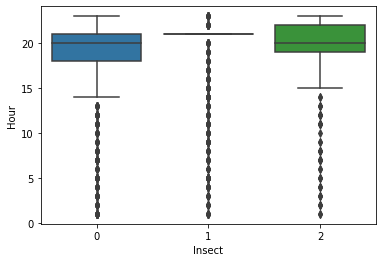

In [75]:
ax = sns.boxplot(x="Insect", y="Hour", data=data)

Se puede ver confirmar, que como se decia en el enunciado, los insectos al ser nocturnos tienen mayor actividad por las noches. Aunque tiene una forma muy peculiar, sobre todo en la familia numero uno, para poder entenderlo de una mejor manera es mejor mirar los valores en la tabla despues de reagruparlos

In [92]:
#Agrupacion de los datos segun la hora y la familia a la que pertenecen. Representacion de las horas con mayor actividad
grouped_Hour_Insect = data.groupby(['Hour','Insect'])
grouped_Hour_Insect.count().tail(20)

Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
Hour Insect                                                     
20   2           107           107          107           107   
21   0           632           632          632           632   
     1          2482          2482         2482          2482   
     2           121           121          121           121   
22   0           687           687          687           687   
     1            17            17           17            17   
     2            98            98           98            98   
23   0            14            14           14            14   
     1            15            15           15            15   
     2           114           114          114           114   

             Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  
Hour Insect                                                          
20   2                     107               107                107  
21   0                     632               632                632  
     1                    2482              2482               2482  
     2                     121               121                121  
22   0                     687               687                687  
     1                      17                17                 17  
     2                      98                98                 98  
23   0                      14                14                 14  
     1                      15                15                 15  
     2                     114               114                114

Con esta tabla se confirma el motivo de la forma de la grafica, ya que podemos ver como todos los insectos del grupo 1 son detectados a las 21 horas

### Insect- Sensores

Representación de las diferentes variables entre si con una gráfica de puntos. Y en la diagonal un histograma para ver la distribucion de cada variable separando los distintos tipos de insectos en diferentes colores.

In [ ]:
## Representación de las diferentes variables entre si  separando los distintos tipos de insectos en diferentes colores  
plt.figure(figsize=(5, 5))
sns.pairplot(data, hue='Insect', diag_kind='kde', palette='colorblind', corner=True)

Se puede ver dentro de todas las graficas como dentro de la distribucion de los sensores respecto al tipo de insectos. Teniendo en alguno de ellos una diferencia más delimitada, lo que nos permite podeer utilizarlos para nuestro modelo. Siendo estos sensor_alpha_plus, sensor_beta, sensor_gamma

Representación en un plano 3d para saber como se correlacionan los tres sensores basicos, y luego lo sensores+.Para determinar si hay diferencia o alguna relacion entre ellos.

<IPython.core.display.Javascript object>


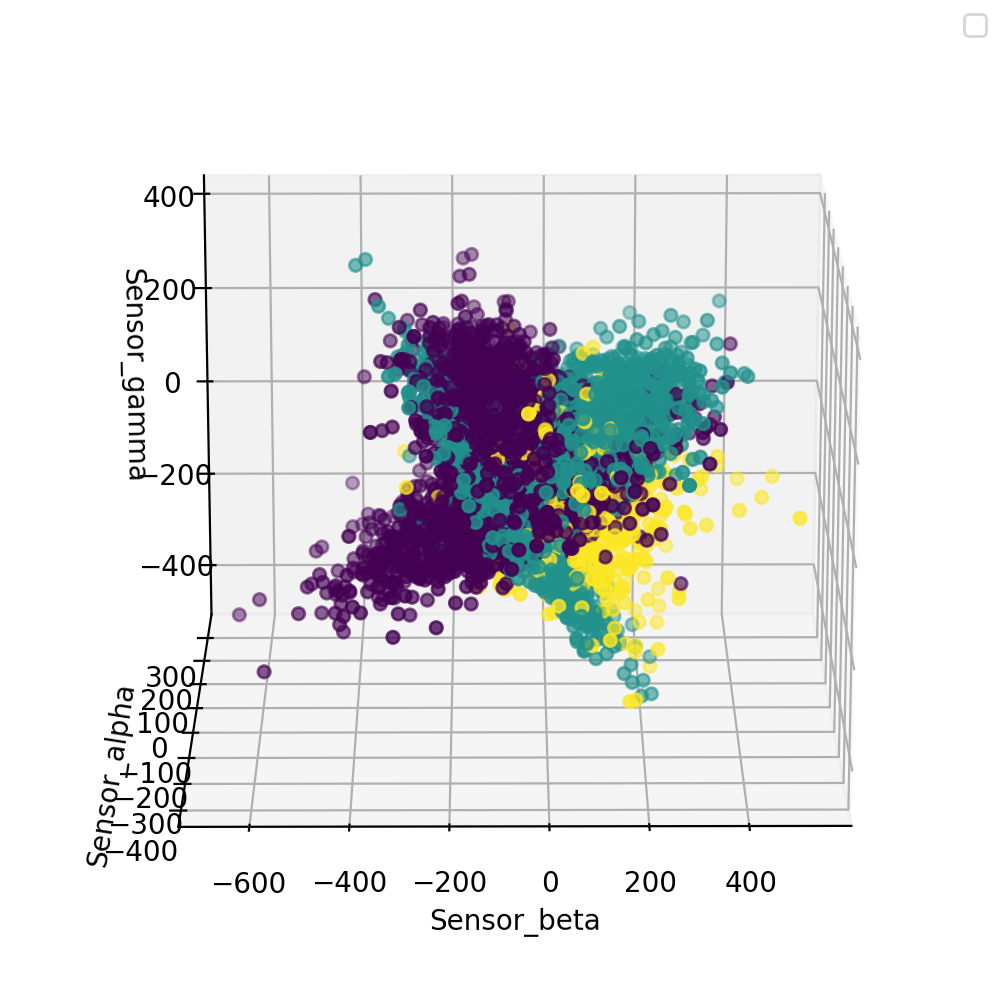

No handles with labels found to put in legend.


In [272]:
%matplotlib notebook
fig = plt.figure(figsize=(5, 5))

## Asignacion de los sensores con los ejes
ax = Axes3D(fig)
y = data['Sensor_alpha']
x = data['Sensor_beta']
z = data['Sensor_gamma']

## Separando las clases de insectos por colores
c = data['Insect']
ax.scatter(x,y,z, c=c,)

## Agregación de  los nombres como etiquetas y titulo
plt.title('Distancia Sensores')
ax.set_ylabel('Sensor_alpha')
ax.set_xlabel('Sensor_beta')
ax.set_zlabel('Sensor_gamma')

## Colocación de la leyenda
plt.legend()

<IPython.core.display.Javascript object>


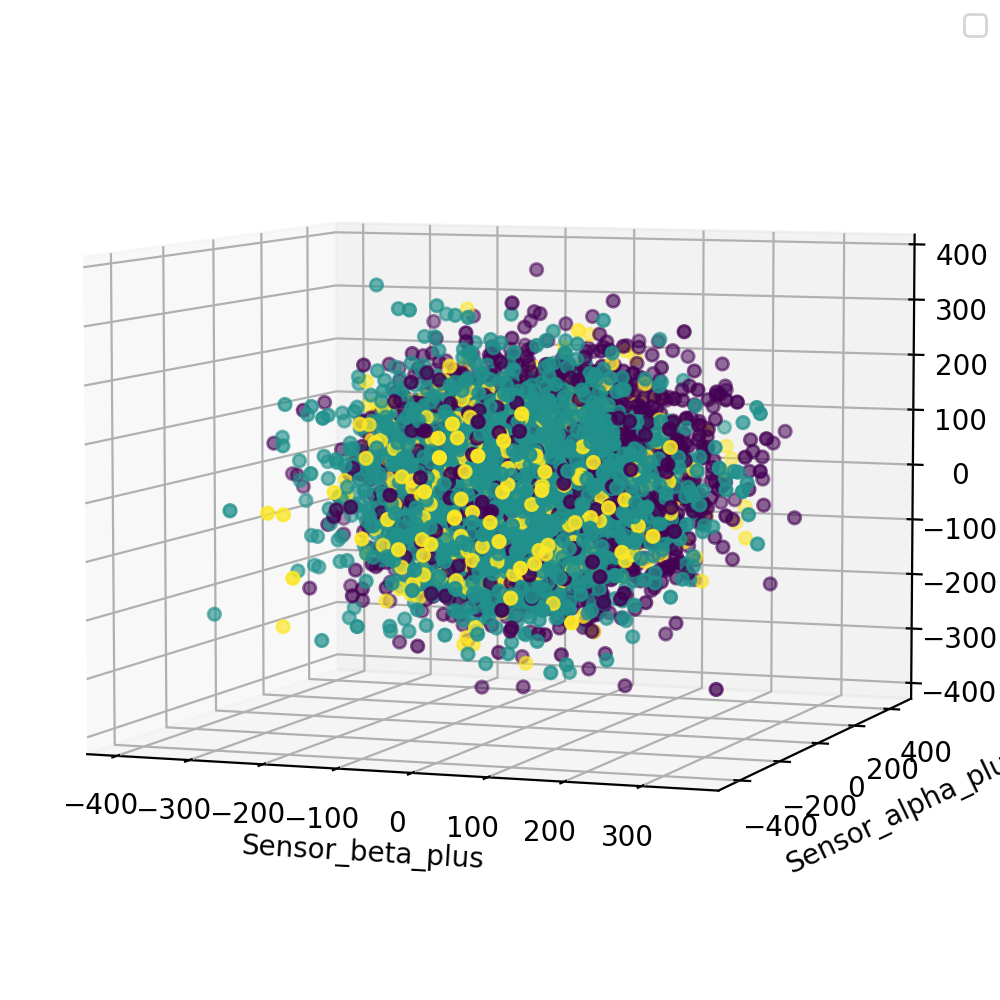

No handles with labels found to put in legend.


In [129]:
%matplotlib notebook
fig = plt.figure(figsize=(5, 5))

## Asignacion de los sensores con los ejes
ax = Axes3D(fig)
y = data['Sensor_alpha_plus']
x = data['Sensor_beta_plus']
z = data['Sensor_gamma_plus']

## Separando las clases de insectos por colores
c = data['Insect']
ax.scatter(x,y,z, c=c,)

## Agregación de  los nombres como etiquetas y titulo
plt.title('Distancia Sensores')
ax.set_ylabel('Sensor_alpha_plus')
ax.set_xlabel('Sensor_beta_plus')
ax.set_zlabel('Sensor_gamma_plus')
plt.legend()

Gracias a las gráficas se puede ver, como los insectos se distribuyende de forma distinta en el espacio. Y que segun que sensores se utilice,se puede analizar mejor esta diferencia. Pero por otra parte, no se puede explicar el porque alguna de los sensores se denominan con solo la palabra, y otros con el añadido del plus 

Representacion en el espacio de los insectos segun la distancia de sensores con una diferencia mas delimitada entre las diferente familias.

<IPython.core.display.Javascript object>


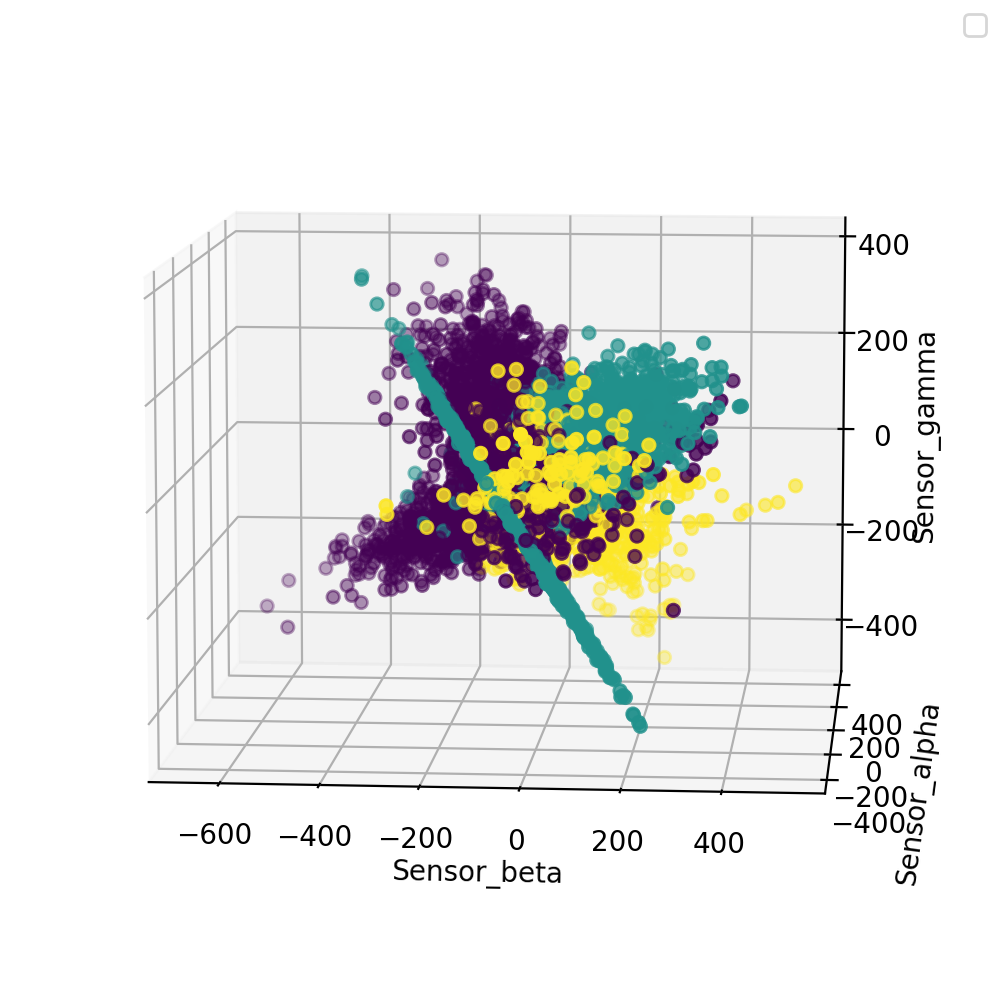

No handles with labels found to put in legend.


In [132]:
%matplotlib notebook
fig = plt.figure(figsize=(5, 5))

## Asignacion de los sensores con los ejes
ax = Axes3D(fig)
y = data['Sensor_alpha_plus']
x = data['Sensor_beta']
z = data['Sensor_gamma']

## Separando las clases de insectos por colores 
c = data['Insect']
ax.scatter(x,y,z, c=c,)

## Agregación de  los nombres como etiquetas y titulo
plt.title('Distancia Sensores')
ax.set_ylabel('Sensor_alpha_plus')
ax.set_xlabel('Sensor_beta')
ax.set_zlabel('Sensor_gamma')
plt.legend()

Se puede ver que hay formas como planos dentro del gráfico, y como cada insecto tiene una mayor representación dentro de una zona especifica. Con el fin de poder verlo mejor analizaremos cada grupo de insectos por separado   

In [19]:
## Creacion de un nuevo data con solo los insectos del grupo 1
data_Insect1 = data.loc[data.Insect != 2, :]
data_Insect1 = data_Insect1.loc[data_Insect1.Insect != 0, :]

<IPython.core.display.Javascript object>


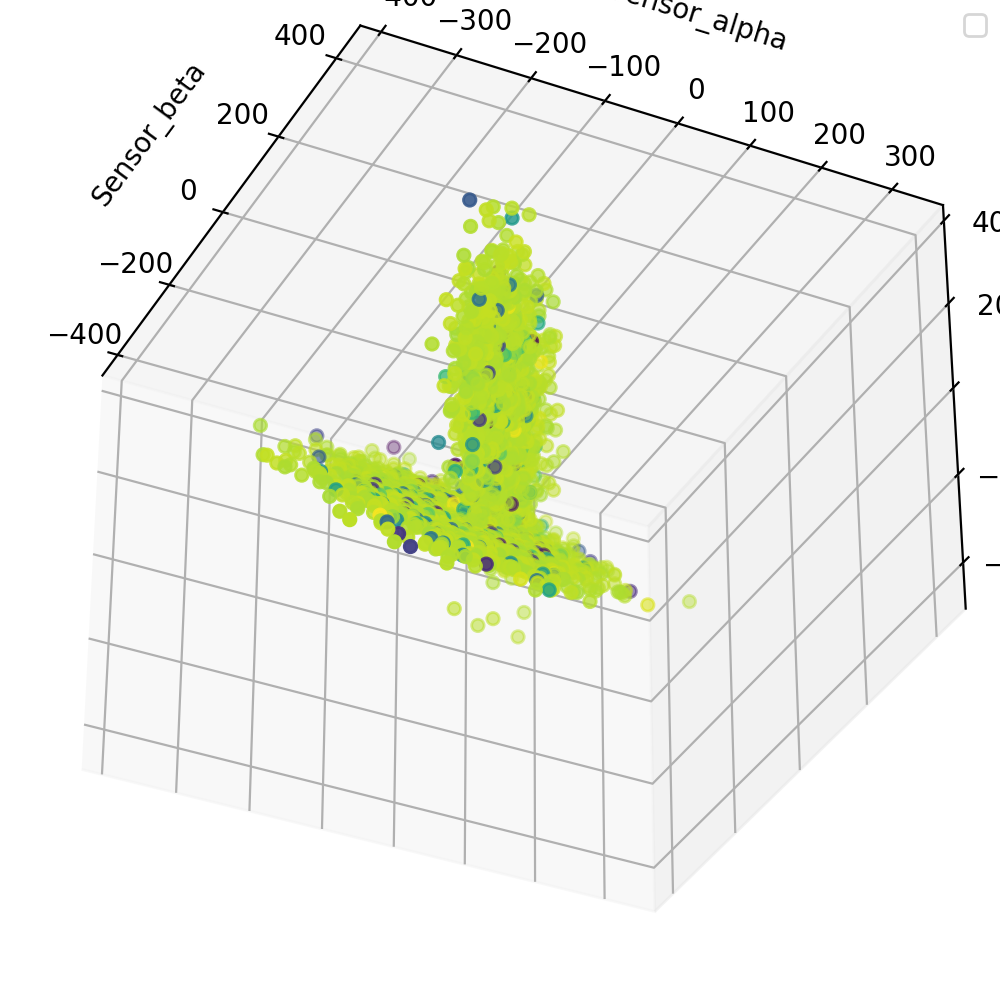

No handles with labels found to put in legend.


In [20]:
%matplotlib notebook
fig = plt.figure(figsize=(5, 5))

## Asignacion de los sensores con los ejes
ax = Axes3D(fig)
y = data_Insect1['Sensor_alpha_plus']
x = data_Insect1['Sensor_beta']
z = data_Insect1['Sensor_gamma']

## Separando las clases de insectos por colores
c = data_Insect1['Insect']
ax.scatter(x,y,z, c=c)

## Agregación de  los nombres como etiquetas y titulo
plt.title('Distancia Sensores')
ax.set_ylabel('Sensor_alpha_plus')
ax.set_xlabel('Sensor_beta')
ax.set_zlabel('Sensor_gamma')
plt.legend()

In [11]:
## Creacion de un nuevo data con solo los insectos del grupo 2
data_Insect2 = data.loc[data.Insect != 1, :]
data_Insect2 = data_Insect2.loc[data_Insect2.Insect != 0, :]

<IPython.core.display.Javascript object>


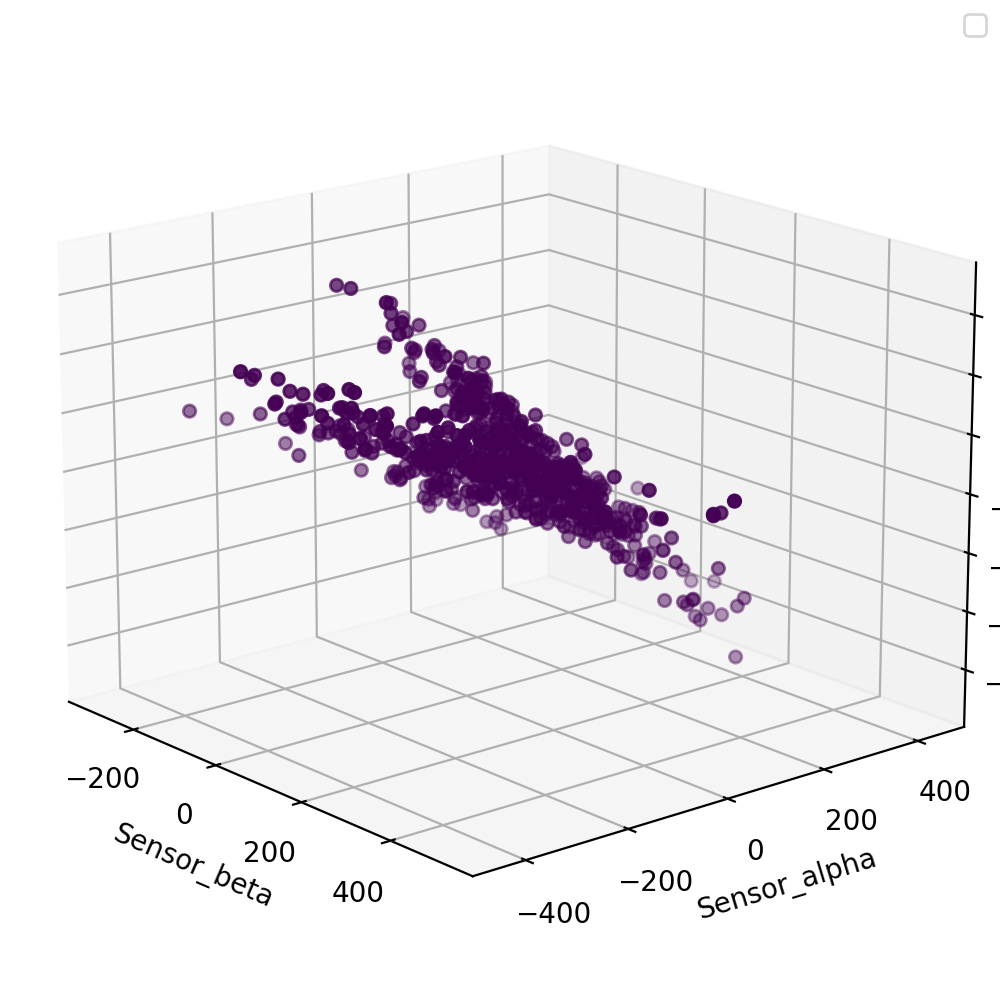

No handles with labels found to put in legend.


In [13]:
%matplotlib notebook
fig = plt.figure(figsize=(5, 5))

## Asignacion de los sensores con los ejes
ax = Axes3D(fig)
y = data_Insect2['Sensor_alpha_plus']
x = data_Insect2['Sensor_beta']
z = data_Insect2['Sensor_gamma']

## Separando las clases de insectos por colores
c = data_Insect2['Insect']
ax.scatter(x,y,z, c=c,)

## Agregación de  los nombres como etiquetas y titulo
plt.title('Distancia Sensores')
ax.set_ylabel('Sensor_alpha_plus')
ax.set_xlabel('Sensor_beta')
ax.set_zlabel('Sensor_gamma')
plt.legend()

In [14]:
## Creacion de un nuevo data con solo los insectos del grupo 0
data_Insect0 = data.loc[data.Insect != 1, :]
data_Insect0 = data_Insect0.loc[data_Insect0.Insect != 2, :]

<IPython.core.display.Javascript object>


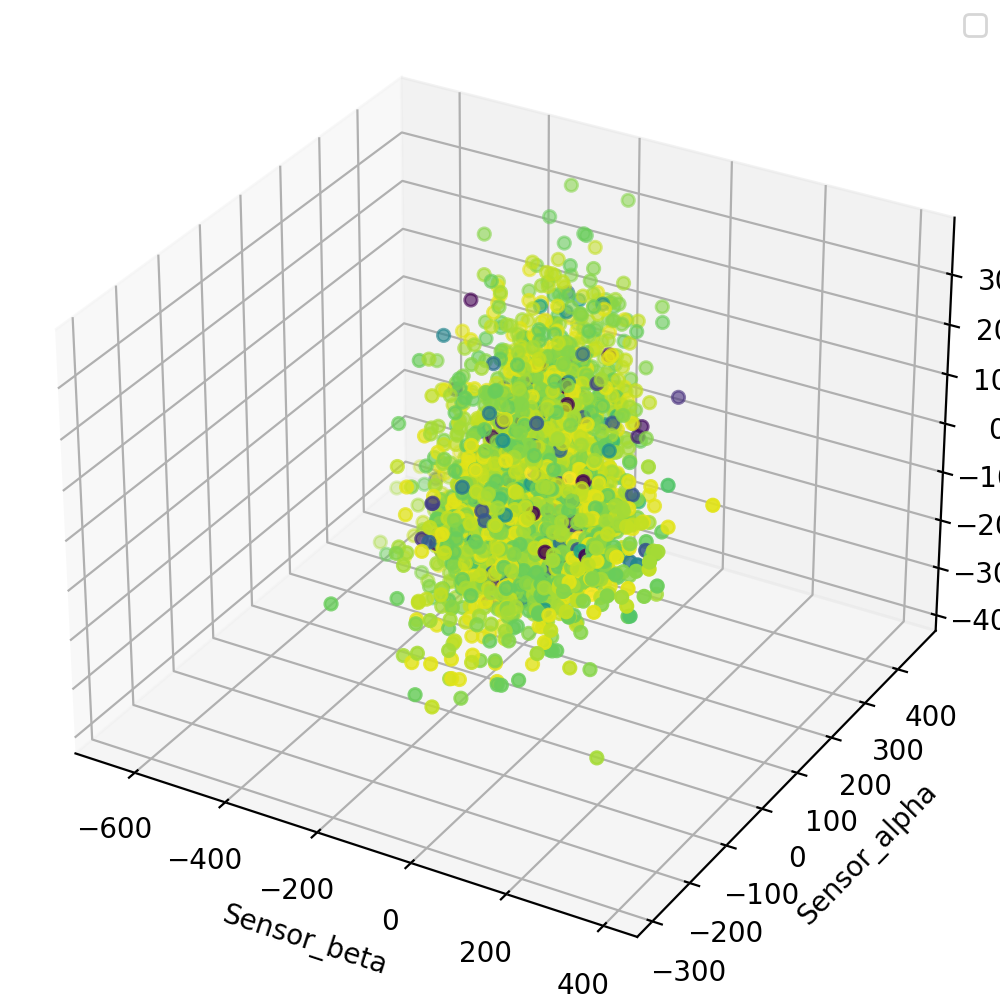

No handles with labels found to put in legend.


In [17]:
%matplotlib notebook
fig = plt.figure(figsize=(5, 5))

## Asignacion de los sensores con los ejes
ax = Axes3D(fig)
y = data_Insect0['Sensor_alpha_plus']
x = data_Insect0['Sensor_beta']
z = data_Insect0['Sensor_gamma']

## Separando las clases de insectos por colores
c = data_Insect0['Insect']
ax.scatter(x,y,z, c=c,)

## Agregación de  los nombres como etiquetas y titulo
plt.title('Distancia Sensores')
ax.set_ylabel('Sensor_alpha_plus')
ax.set_xlabel('Sensor_beta')
ax.set_zlabel('Sensor_gamma')
plt.legend()

Despues de ver todas las gráficas, se muestar que los posen una forma parecida pero con difernte distribución. Es decir que posee dos planos delimitados que cruzan entre si.

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=(5, 5))

## Asignacion de los sensores con los ejes
ax = Axes3D(fig)
y = data_Insect1['Sensor_alpha_plus']
x = data_Insect1['Sensor_beta']
z = data_Insect1['Sensor_gamma']

## Separando las clases de insectos segun las horas
c = data_Insect1['Hour']
ax.scatter(x,y,z, c=c, cmap='coolwarm')

## Agregación de  los nombres como etiquetas y titulo
plt.title('Distancia Sensores')
ax.set_ylabel('Sensor_alpha_plus')
ax.set_xlabel('Sensor_beta')
ax.set_zlabel('Sensor_gamma')
plt.legend()

 No he sido capaz de entender por el que de estas formas, uno de los intentos para explicarlo ha sido si influia el tiempo. Pero como se ve en la grafica, no afecta en ello.

## Modelaje

In [292]:
##Selección de variables para realizar el modelo predictivo
X = data[['Sensor_alpha_plus', 'Sensor_beta','Sensor_gamma','Hour']]
Y= data['Insect']

In [293]:
## Split de nuestra tabla para realizar nuestro modelo en una parte de la misma y compararlo con la otra parte
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

In [294]:
## Comprobación de la distribución de ejemplos por cada familia de insectos
data['Insect'].value_counts()

0    3519
1    2793
2     689
Name: Insect, dtype: int64

Debido a que hay un desbalance dentro de la distribucion de la variable que queremos predecir, voy a utilizar un metodo para equilibrarlo. El metodo que he seleccionado es 'kmeans_smote' ya que la variable que quiero predecir se encuentra bastante delimitada en el espacio, haciendo que funcione mejor este metodo

In [309]:
kmeans_smote = KMeansSMOTE(
     kmeans_args={
         'n_clusters': 50},
     smote_args={
        'k_neighbors': 10
     })

In [310]:
X_train_resampled, Y_train_resampled = kmeans_smote.fit_resample(X_train, Y_train)

In [311]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0).fit(X_train_resampled, Y_train_resampled) 
Y_pred = clf.predict(X_test)

In [312]:
f1_score(Y_test, Y_pred, average=None)

array([0.88899386, 0.89501466, 0.67368421])

In [313]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
print(cf_matrix)

[[941  94  43]
 [ 51 763  17]
 [ 47  17 128]]
